# Outpatient Waiting Lists, Ireland

***

Data sourced from [ehealthireland](https://data.ehealthireland.ie/dataset/outpatient-waiting-list). The OP Waiting List Open Data report shows the total number of people waiting, across the various time bands, for a first appointment at a consultant-led Outpatient clinic.

In [1]:
# import the pandas library
import pandas as pd

In [3]:
# load csv
df = pd.read_csv("./datasets/OpenData_OPNational01_2024.csv")

In [5]:
# view a small version of the dataframe
df

,ArchiveDate,Adult_Child,HospitalName,0-6 Months,6-12 Months,12-18 Months,18 Months +,Total
0,25/01/2024,Adult,Bantry General Hospital,626,218,63,37,944
1,25/01/2024,Adult,Beaumont Hospital,"24,513","9,977",910,98,"35,497"
2,25/01/2024,Adult,Cavan General Hospital,"5,588","1,652",22,18,"7,279"
3,25/01/2024,Adult,Connolly Hospital Blanchardstown,"4,498",239,0,0,"4,737"
4,25/01/2024,Adult,Coombe Women and Infants University Hospital,"1,370",922,285,60,"2,636"
...,...,...,...,...,...,...,...,...
73,25/01/2024,Child,Tipperary University Hospital,312,41,2,0,355
74,25/01/2024,Child,University Hospital Kerry,712,251,42,0,"1,004"
75,25/01/2024,Child,University Hospital Limerick,"2,489",899,202,111,"3,701"
76,25/01/2024,Child,University Hospital Waterford,"1,875","1,171",222,305,"3,573"


Lets plot the Total number of outpatients by hospital. Before that we need to check the datatypes.

In [12]:
# view datatypes
df.dtypes

ArchiveDate     object
Adult_Child     object
HospitalName    object
0-6 Months      object
6-12 Months     object
12-18 Months    object
18 Months +     object
Total           object
dtype: object

All objects, so need to convert Total to numeric.

In [13]:
# Convert 'Total' column to numeric
df['Total'] = pd.to_numeric(df['Total'])

ValueError: Unable to parse string "35,497" at position 1

That throws an error, because there are commas in the numbers in the thousands i.e 1,000. Lets remove all the commas and convert to numeric at the same time.

In [14]:
# Remove commas from 'Total Patients' column and convert to numeric
df['Total'] = df['Total'].str.replace(',', '').astype(int)

Now lets check the datatypes again.

In [15]:
# view datatypes
df.dtypes

ArchiveDate     object
Adult_Child     object
HospitalName    object
0-6 Months      object
6-12 Months     object
12-18 Months    object
18 Months +     object
Total            int64
dtype: object

'Total' in now an integer. We can start to plot.

<Axes: xlabel='HospitalName'>

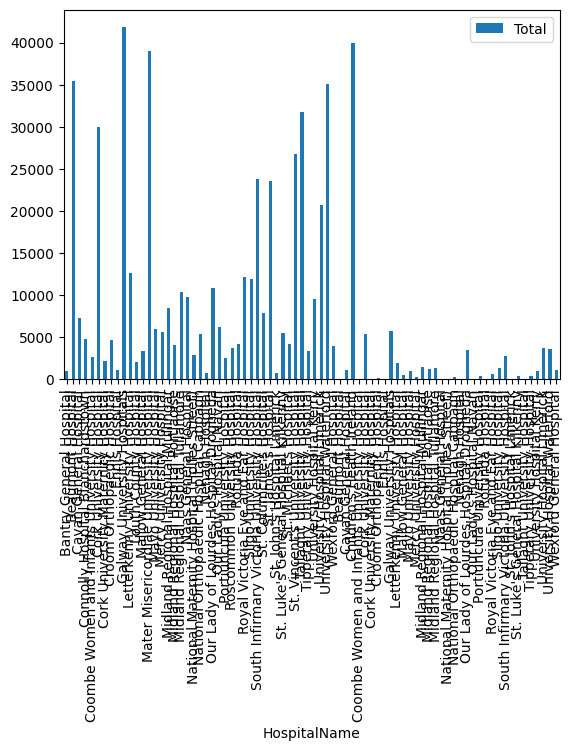

In [16]:
# plot barchart
df.plot.bar(x='HospitalName', y='Total')

Hospital names are a bit squished on the x axis. We can use "figsize=()" to set the plot dimensions.

<Axes: xlabel='HospitalName'>

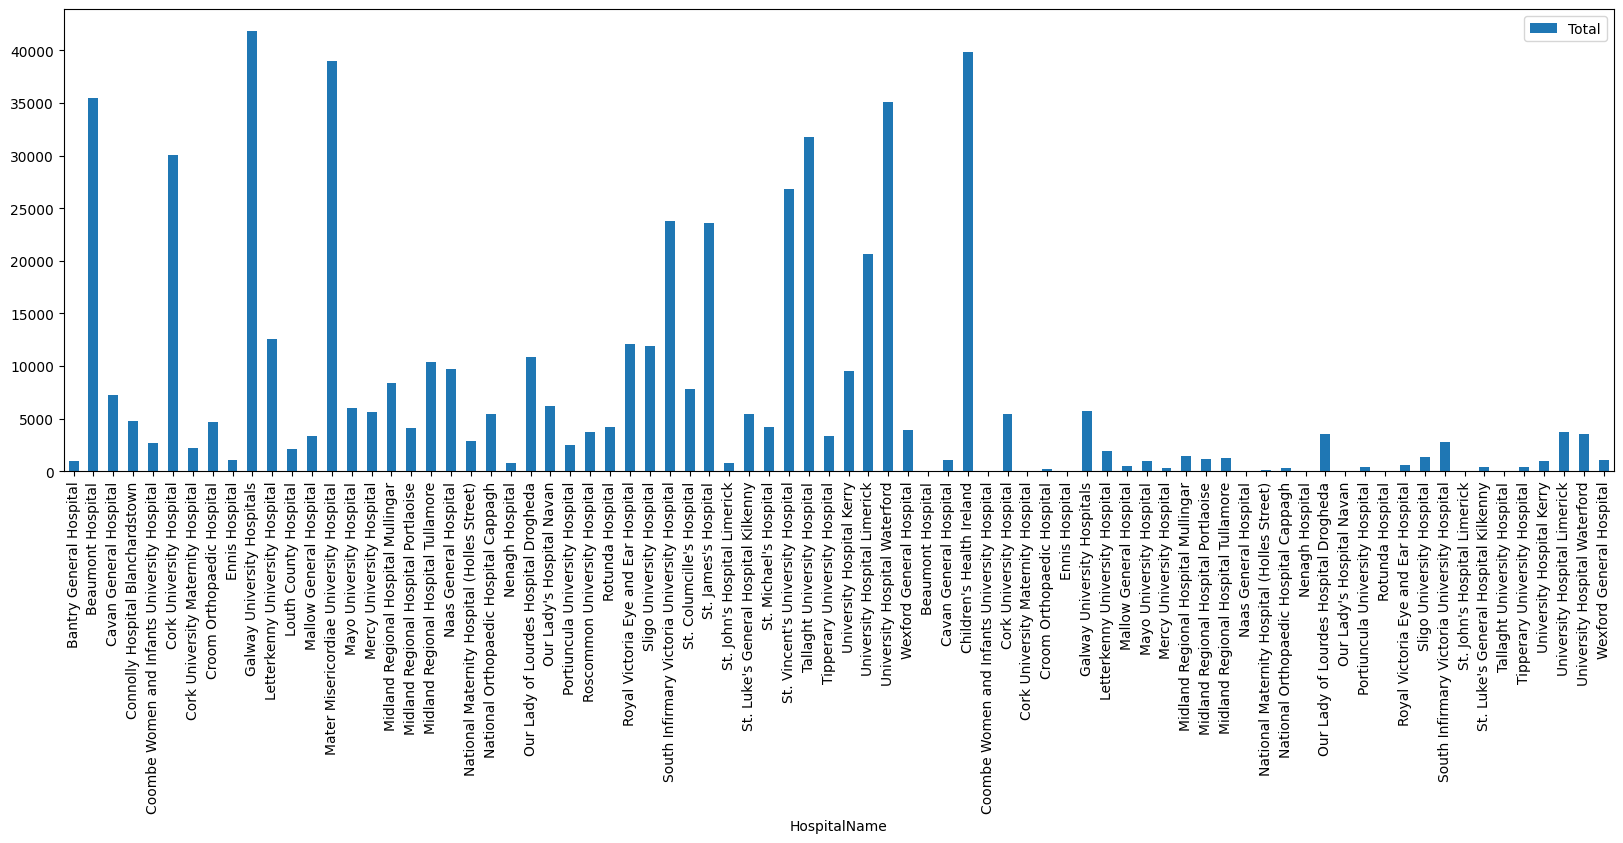

In [22]:
# plot barchart
df.plot.bar(x='HospitalName', y='Total', legend=True, figsize=(20, 6))


To add a label to the y-axis for clarity we have to modify the code slightly.

Text(0, 0.5, 'Total Patients')

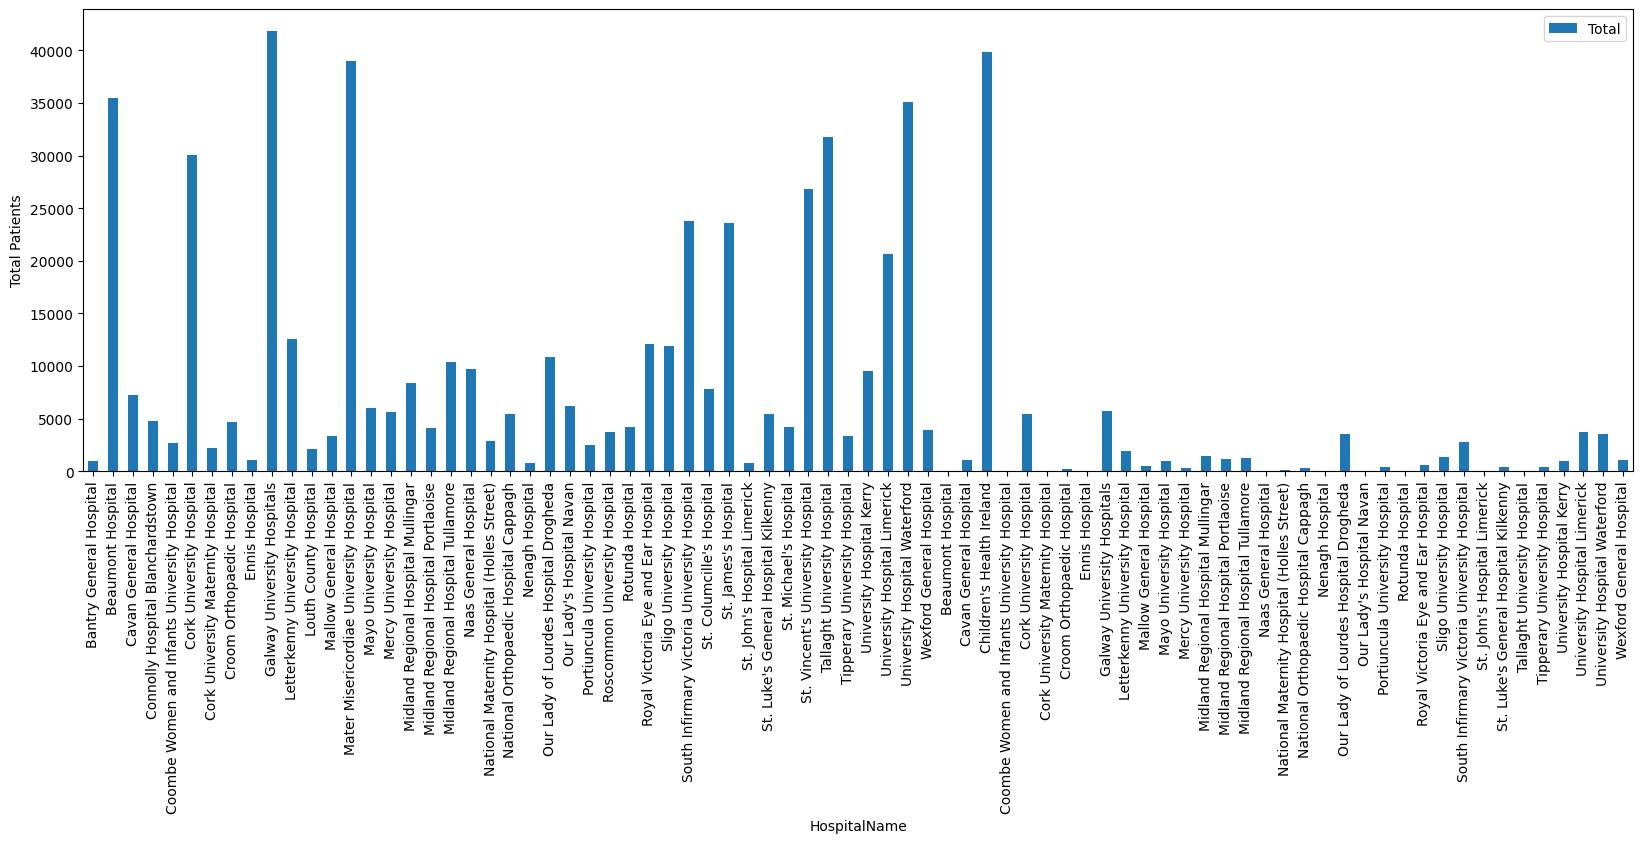

In [23]:
# plot barchart
ax = df.plot.bar(x='HospitalName', y='Total', legend=True, figsize=(20, 6))
ax.set_ylabel('Total Patients')